In [1]:
#Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [2]:
cols=range(0,23)
train = pd.read_csv('C:/Users/VigneshwarPesaru/Backorders/Kaggle_Training_Dataset_v2.csv', usecols=cols)
test = pd.read_csv('C:/Users/VigneshwarPesaru/Backorders/Kaggle_Test_Dataset_v2.csv', usecols=cols)

masterData = train.append(test)
print("masterData shape:",masterData.shape)

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


masterData shape: (1929937, 23)


In [3]:
masterData.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [4]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929937 entries, 0 to 242075
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   sku                object 
 1   national_inv       float64
 2   lead_time          float64
 3   in_transit_qty     float64
 4   forecast_3_month   float64
 5   forecast_6_month   float64
 6   forecast_9_month   float64
 7   sales_1_month      float64
 8   sales_3_month      float64
 9   sales_6_month      float64
 10  sales_9_month      float64
 11  min_bank           float64
 12  potential_issue    object 
 13  pieces_past_due    float64
 14  perf_6_month_avg   float64
 15  perf_12_month_avg  float64
 16  local_bo_qty       float64
 17  deck_risk          object 
 18  oe_constraint      object 
 19  ppap_risk          object 
 20  stop_auto_buy      object 
 21  rev_stop           object 
 22  went_on_backorder  object 
dtypes: float64(15), object(8)
memory usage: 353.4+ MB


In [5]:
new_column_names = ['product_id', 'current_inventory', 'transit_duration', 'transit_quantity',
                   'forecast_sales_3_months', 'forecast_sales_6_months', 'forecast_sales_9_months',
                   'prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                   'prior_sales_9_month', 'minimum_recommend_stock', 'source_has_issue',
                   'source_overdue', 'source_performance_6_months', 'source_performance_12_months',
                   'stock_overdue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy',
                   'rev_stop', 'went_on_backorder']

masterData.columns = new_column_names

In [6]:
masterData.head()

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,...,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
masterData.describe()

,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [8]:
masterData.describe(include = ['object'])

,product_id,source_has_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1929937,1929935,1929935,1929935,1929935,1929935,1929935,1929935
unique,1929937,2,2,2,2,2,2,2
top,3273673,No,No,No,No,Yes,No,No
freq,1,1928946,1494482,1929643,1697383,1859391,1929096,1915954


In [9]:
masterData.isnull().sum()

product_id                           0
current_inventory                    2
transit_duration                115619
transit_quantity                     2
forecast_sales_3_months              2
forecast_sales_6_months              2
forecast_sales_9_months              2
prior_sales_1_month                  2
prior_sales_3_month                  2
prior_sales_6_month                  2
prior_sales_9_month                  2
minimum_recommend_stock              2
source_has_issue                     2
source_overdue                       2
source_performance_6_months          2
source_performance_12_months         2
stock_overdue                        2
deck_risk                            2
oe_constraint                        2
ppap_risk                            2
stop_auto_buy                        2
rev_stop                             2
went_on_backorder                    2
dtype: int64

Most of the columns have just a two entries as null. Quite possible that all these NaN belong to same row which might 
be header or footer.If we will remove this row it will also solve the mix datatypes issue which we saw during data load.

There are nulls and lots of 0's in each column. During the EDA/Feature engineering step we can determine if we want to omit
or keep this column. But for now we will look for an approach to fill these missing values

In [10]:
masterData[masterData.current_inventory.isnull()]

,product_id,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,...,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
masterData.drop([1687860, 242075], inplace = True)

In [12]:
masterData.isnull().sum()

product_id                           0
current_inventory                    0
transit_duration                115616
transit_quantity                     0
forecast_sales_3_months              0
forecast_sales_6_months              0
forecast_sales_9_months              0
prior_sales_1_month                  0
prior_sales_3_month                  0
prior_sales_6_month                  0
prior_sales_9_month                  0
minimum_recommend_stock              0
source_has_issue                     0
source_overdue                       0
source_performance_6_months          0
source_performance_12_months         0
stock_overdue                        0
deck_risk                            0
oe_constraint                        0
ppap_risk                            0
stop_auto_buy                        0
rev_stop                             0
went_on_backorder                    0
dtype: int64

In [13]:
masterData.product_id = masterData.product_id.astype(int)

# Handling NAN and Missing Values

The following are the observations made in the dataset:

    1. Transit duration has 115616 null values.
    
    2. Missing values in columns source_performance_6_months and source_performance_12_months are represented with '-99'. 
    
    3. source_performance_6_months has 1299478 missing values, source_performance_12_months has 122050 missing values.
    
    4. Heatmap shows that there is a strong coorelation between source_performance_6_months and source_performance_12_months.


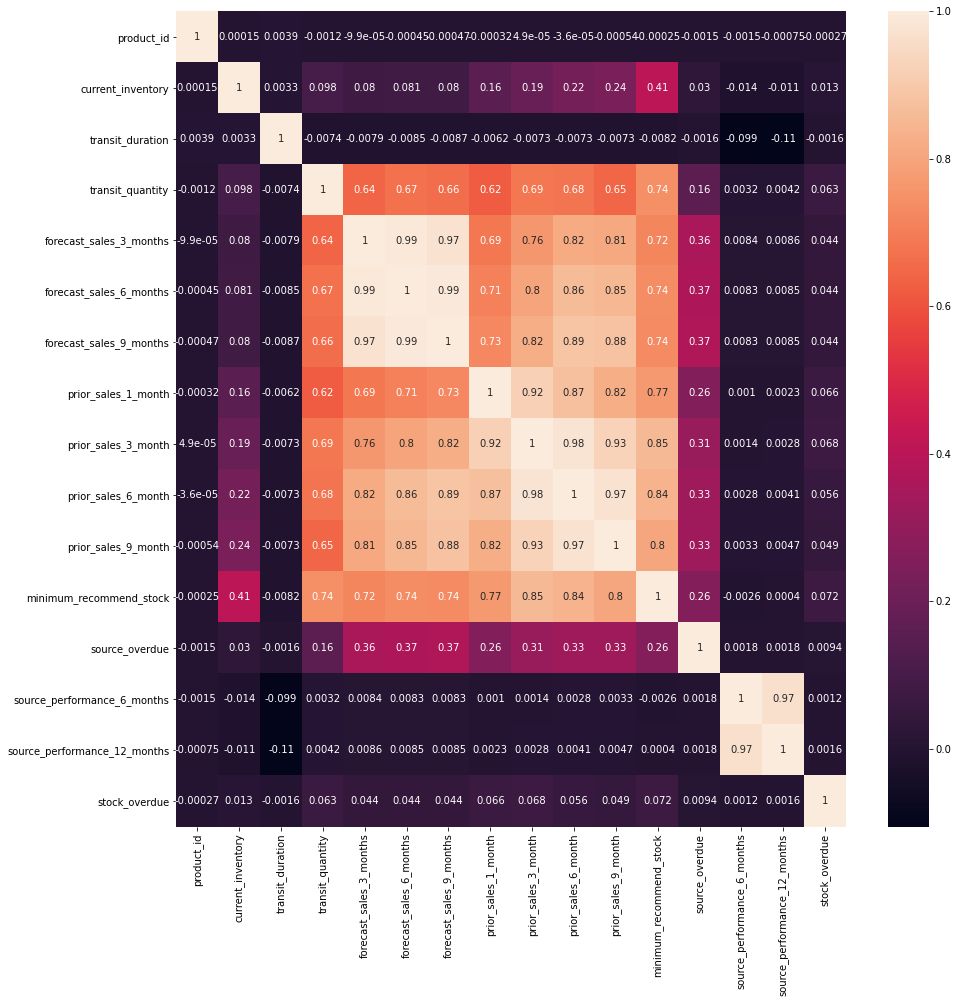

In [14]:
#finding the correlations
fig, ax = plt.subplots(figsize=(15, 15))
col_corr = masterData.corr()
sns.heatmap(col_corr, annot = True)
plt.show('Heatmap of Correlation Matrix')

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Transit Duration Range and Distribution')]

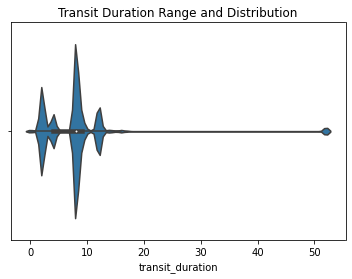

In [15]:
#View the range and distribution through the violinplots
sns.violinplot(masterData.transit_duration).set(title='Transit Duration Range and Distribution')
#sns.plt.title('Transit Duration Range and Distribution')

In [16]:
#Fill the null values with median
masterData['transit_duration'] = masterData['transit_duration'].fillna(masterData['transit_duration'].median())

In [17]:
masterData['transit_duration'].isnull().sum()

0

In [18]:
masterData['transit_duration'].value_counts()

8.0     896335
2.0     384319
12.0    228997
4.0     147045
9.0     141423
52.0     34418
3.0      18602
10.0     16248
0.0      12026
14.0     11820
16.0     10132
13.0      6160
6.0       5826
5.0       4609
15.0      4355
17.0      4300
11.0      1246
20.0       477
30.0       356
18.0       253
7.0        239
22.0       152
24.0       148
26.0       120
28.0        96
21.0        56
40.0        56
35.0        40
19.0        32
1.0         24
23.0        16
25.0         8
Name: transit_duration, dtype: int64

In [19]:
#checking for the duplicates in the product_id field
masterData['product_id'].duplicated().sum()

0

Given that we do have cells with -99 in the sourec_performance_12_months and source_performance_6_months of  masterData, 
we need to comeup with a feature engineering technique appropriately to replace these values with most desirable one's. 
Heat map strongly indicates that there is strong relationship correlationship between these two. Hence, we can use the linear
regression to estimate the missing values. However, there are quiet a lot missing values, it is strongly encouraged to
replace the missing values with the alternate approach. In this case, we are trying to replace the missing values with the
median of their respective fields

In [20]:
#Replace -99 with NAN in the source_performance_12_months and source_performance_6_months of masterData set
masterData['source_performance_12_months'].replace({-99.00:np.nan}, inplace = True)
masterData['source_performance_6_months'].replace({-99.00:np.nan}, inplace = True)

In [21]:
(masterData['source_performance_12_months']==-99.00).sum()

0

In [22]:
(masterData['source_performance_6_months']==-99.00).sum()

0

In [23]:
#Linear regression for fillin the NAN's 
x_12months = masterData[masterData.source_performance_6_months.notnull() 
                        & masterData.source_performance_12_months.notnull()][['source_performance_12_months']]
y_6months = masterData[masterData.source_performance_6_months.notnull() 
                       & masterData.source_performance_12_months.notnull()][['source_performance_6_months']]

In [24]:

linReg = LinearRegression()
linReg.fit(x_12months,y_6months)

LinearRegression()

In [25]:
#Predicted NAN values
test_12months = masterData[masterData['source_performance_6_months'].isnull() 
                           & masterData['source_performance_12_months'].notnull()][['source_performance_12_months']]
pred_6months = linReg.predict(test_12months)


In [26]:
#Fill the null values
reg_6_months_list = list(zip(test_12months.index, pred_6months)) 

In [27]:
for val in reg_6_months_list:
      #print(val[0], val[1])
      #masterData.set_value(index=val[0], value =val[1], col='source_performance_6_months')
      masterData.loc[val[0], 'source_performance_6_months'] = float(str(val[1])[1:-1])


In [28]:
#check if the value is inserted
masterData.source_performance_6_months.isnull().sum()

139825

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Source Performance Range and Distribution')]

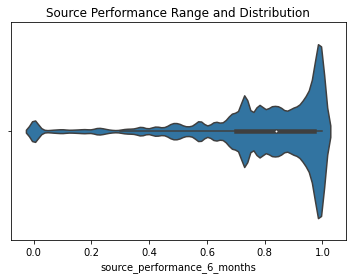

In [29]:
#View range and distribution through violin chart
sns.violinplot(masterData.source_performance_6_months).set(title='Source Performance Range and Distribution')
#sns.plt.title('Transit Duration Range and Distribution')

In [30]:
#Imputing the missing values in the source_performance_6_months field with the median values
masterData.source_performance_6_months.fillna(masterData.source_performance_6_months.median(), inplace = True)

In [31]:
masterData.source_performance_6_months.isnull().sum()

0

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Source Performance of 12 months Range and Distribution')]

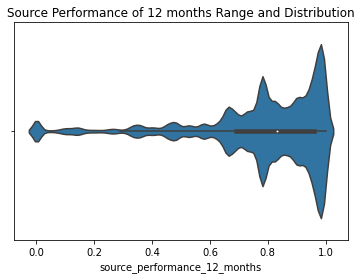

In [32]:
#View range and distribution of the source_performance_12_months
sns.violinplot(masterData.source_performance_12_months).set(title='Source Performance of 12 months Range and Distribution')

In [33]:
#imputing the null values with the median values
masterData.source_performance_12_months.fillna(masterData.source_performance_12_months.median(), inplace = True)
masterData.source_performance_12_months.isnull().sum()

0

# Handling the Repetitive values


It can be seen that there are 0's in our masterData.Lets find out the percentage of repeatitions of 0's. If any of the 
columns has more than the 60%, we can safely drop that column. This kind of data trend canbe viewed on violin plot

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'forecast sales of 6 months')]

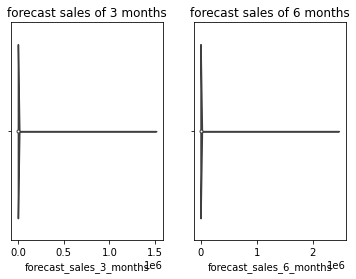

In [34]:
fig, ax1 = plt.subplots(ncols = 2)
sns.violinplot(masterData.forecast_sales_3_months, ax = ax1[0]).set(title='forecast sales of 3 months')
sns.violinplot(masterData.forecast_sales_6_months, ax = ax1[1]).set(title='forecast sales of 6 months')

In [35]:
#Calculating the percentage of repeatitions of 0's in each column
perct_0 = {column: '%2.2f' %(((masterData[column] == 0).sum()/masterData.shape[0])*100)+'%' for column in masterData.columns
                             if masterData[column].dtype == np.float64}

In [36]:
perct_0

{'current_inventory': '6.38%',
 'transit_duration': '0.62%',
 'transit_quantity': '79.90%',
 'forecast_sales_3_months': '69.83%',
 'forecast_sales_6_months': '64.26%',
 'forecast_sales_9_months': '61.25%',
 'prior_sales_1_month': '57.00%',
 'prior_sales_3_month': '45.03%',
 'prior_sales_6_month': '38.32%',
 'prior_sales_9_month': '34.71%',
 'minimum_recommend_stock': '51.67%',
 'source_overdue': '98.53%',
 'source_performance_6_months': '2.31%',
 'source_performance_12_months': '1.96%',
 'stock_overdue': '98.64%'}

In [37]:
#Dropping the columns with the percentage of 0's more than 60%
masterData = masterData.drop(['transit_quantity', 'forecast_sales_3_months', 'forecast_sales_6_months',
                             'forecast_sales_9_months', 'source_overdue', 'stock_overdue'], axis = 1)

In [38]:
masterData.shape

(1929934, 17)

# Handling the outliers

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

<AxesSubplot:xlabel='source_performance_12_months'>

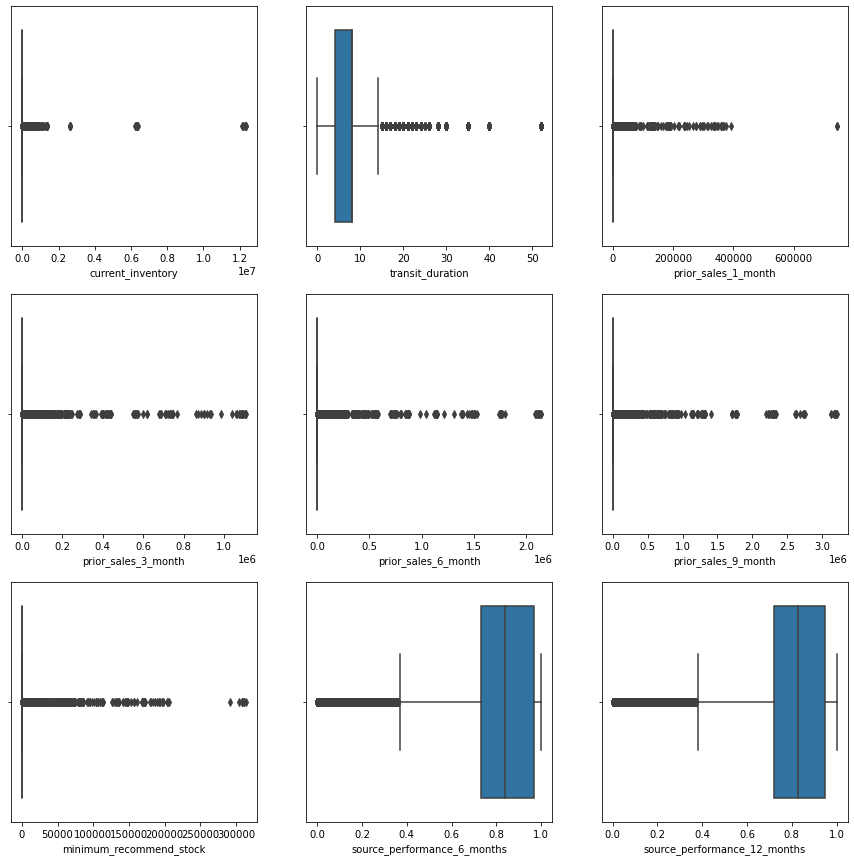

In [39]:
nrows = 3
ncols = 3
fig, ax1 = plt.subplots(nrows, ncols, figsize = (15, 15))
sns.boxplot(masterData.current_inventory, ax = ax1[0,0])
sns.boxplot(masterData.transit_duration, ax = ax1[0,1])
sns.boxplot(masterData.prior_sales_1_month, ax = ax1[0,2])
sns.boxplot(masterData.prior_sales_3_month, ax = ax1[1,0])
sns.boxplot(masterData.prior_sales_6_month, ax = ax1[1,1])
sns.boxplot(masterData.prior_sales_9_month, ax = ax1[1,2])
sns.boxplot(masterData.minimum_recommend_stock, ax = ax1[2,0])
sns.boxplot(masterData.source_performance_6_months, ax = ax1[2,1])
sns.boxplot(masterData.source_performance_12_months, ax = ax1[2,2])


In [40]:
def get_outlier_boundaries(column):
    q75, q25 =  np.percentile(column, [75, 25])
    iqr = q75 - q25
    lower = q25 - 1.5*iqr
    upper = q75 + 1.5*iqr
    return lower,upper
    

In [41]:
transit_duration_upper = get_outlier_boundaries(masterData.transit_duration)[1]
transit_duration_lower = get_outlier_boundaries(masterData.transit_duration)[0]
print(transit_duration_upper, transit_duration_lower)
outlier_transit_duration = masterData[masterData.transit_duration > transit_duration_upper]
#print(outlier_transit_duration.shape)
outlier_transit_duration.went_on_backorder.value_counts()

14.0 -2.0


No     54880
Yes      135
Name: went_on_backorder, dtype: int64

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


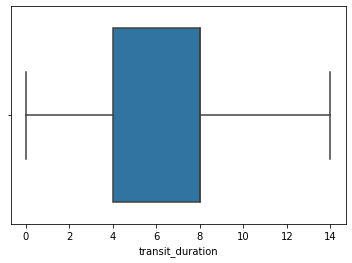

In [42]:
masterData = masterData.drop(outlier_transit_duration.index)
cleaned_ = sns.boxplot(masterData.transit_duration)

C:\Users\VigneshwarPesaru\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transit_duration', ylabel='Density'>

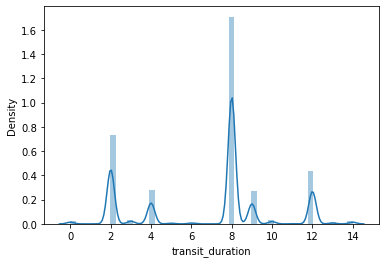

In [43]:
sns.distplot(masterData.transit_duration)

In [44]:
#dropping outliers of minimum recommended stock
outlier_minimum_recommended_stock = masterData[masterData.minimum_recommend_stock > 250000]
outlier_minimum_recommended_stock.shape
#print(outlier_minimum_recommended_stock)

(8, 17)

In [45]:
#lets delete the outlier of the minimum_recommend_stock
masterData = masterData.drop(outlier_minimum_recommended_stock.index, errors = 'ignore')

In [46]:
outlier_current_inventory = masterData[masterData.current_inventory > .2e07]
outlier_current_inventory.shape
#since the count is low, we can drop these records
masterData = masterData.drop(outlier_current_inventory.index, errors = 'ignore')

In [ ]:
masterData.to_csv('Backorder.csv', index = False)